In [27]:
from collections import defaultdict, deque
import numpy as np

In [1]:
import gym

In [3]:
env  = gym.make('MountainCar-v0')

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [6]:
state = env.reset()

In [11]:
env.step(2)

(array([-0.45454172, -0.00162041]), -1.0, False, {})

In [37]:
def update_Q(Qsa, Qsa_next, reward, alpha, gamma):
    """ updates the action-value function estimate using the most recent time step """
    return Qsa + (alpha * (reward + (gamma * Qsa_next) - Qsa))

def epsilon_greedy_probs(env, Q_s, i_episode, eps=None):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    epsilon = 1.0 / i_episode
    if eps is not None:
        epsilon = eps
    policy_s = np.ones(env.action_space.n) * epsilon / env.action_space.n
    policy_s[np.argmax(Q_s)] = 1 - epsilon + (epsilon / env.action_space.n)
    return policy_s

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

def sarsa(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # initialize performance monitor
    plot_every = 100
    tmp_scores = deque(maxlen=plot_every)
    scores = deque(maxlen=num_episodes)
    # loop over episodes
    max_pos = 0
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        # initialize score
        score = 0
        # begin an episode, observe S
        state = env.reset()   
        # get epsilon-greedy action probabilities
        policy_s = epsilon_greedy_probs(env, Q[state[0],state[1]], i_episode)
        # pick action A
        action = np.random.choice(np.arange(env.action_space.n), p=policy_s)
        # limit number of time steps per episode
        for t_step in np.arange(300):
            # take action A, observe R, S'
            next_state, reward, done, info = env.step(action)
            # add reward to score
            score += reward
            if not done:
                # get epsilon-greedy action probabilities
                policy_s = epsilon_greedy_probs(env, Q[next_state[0], next_state[1]], i_episode)
                # pick next action A'
                next_action = np.random.choice(np.arange(env.action_space.n), p=policy_s)
                # update TD estimate of Q
                Q[state[0],state[1]][action] = update_Q(Q[state[0],state[1]][action], Q[next_state[0],next_state[1]][next_action], 
                                        reward, alpha, gamma)
                # S <- S'
                state = next_state
                if state[0] > max_pos:
                    print(state[0])
                    max_pos = state[0]
                # A <- A'
                action = next_action
            if done:
                # update TD estimate of Q
                # print(policy_s)
                Q[state[0],state[1]][action] = update_Q(Q[state[0], state[1]][action], 0, reward, alpha, gamma)
                # append score
                tmp_scores.append(score)
                break
        if (i_episode % plot_every == 0):
            scores.append(np.mean(tmp_scores))
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(scores),endpoint=False),np.asarray(scores))
    aplt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(scores))
    return Q

In [40]:
import sys

In [47]:
state = env.reset()
state

array([-0.40474437,  0.        ])

In [49]:
policy_s = epsilon_greedy_probs(env, Q[state[0],state[1]],1 )
policy_s

array([0.33333333, 0.33333333, 0.33333333])

In [65]:
action = np.random.choice(np.arange(env.action_space.n), p=policy_s)
action

0

In [103]:
next_state, reward, done, info = env.step(action)
next_state, reward, done

(array([-0.95100438, -0.00309563]), -1.0, False)

In [111]:
x = 0
for i in Q_sarsa.items():
    x +=1
x

1000000

In [116]:
alphas = [0.01,0.001,0.0001,0.00001]

In [ ]:
Q_sarsa = sarsa(env, 500000, alphas[2],gamma=0.8)


Episode 77000/500000

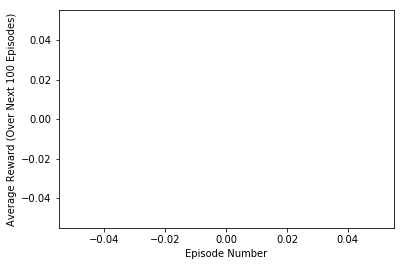

ValueError: zero-size array to reduction operation maximum which has no identity

In [113]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 2, .01)

Episode 5000/5000

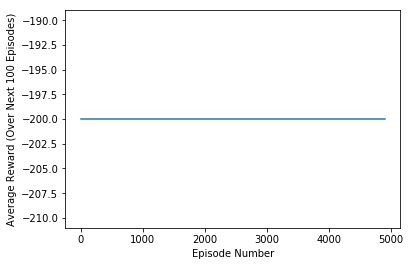

Best Average Reward over 100 Episodes:  -200.0


In [114]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)

In [28]:
Q = defaultdict(lambda: np.zeros(env.action_space.n))

In [36]:
Q[state[0],state[1]]

array([0., 0., 0.])

In [24]:
state

array([-0.42694917,  0.        ])

In [22]:
state = env.reset()

In [23]:
epsilon_greedy_probs(env, Q[state],3)

TypeError: unhashable type: 'numpy.ndarray'

In [14]:
from __future__ import print_function

In [16]:
# evaluate the policy and reshape the state-value function
V_pred = td_prediction(env, 5000, policy, .01)

NameError: name 'policy' is not defined

In [144]:
max_reward = -100
total_reward = 0
env.reset()
for i in range(100):
    #env.render()
    action = np.random.choice(np.arange(env.action_space.n))
    env.step(action)
    next_state, reward, done, info = env.step(action)
    print(next_state)
    total_reward +=reward
    if reward > max_reward:
        print(reward)
        max_reward = reward


[-0.47068017  0.00123239]
-1.0
[-0.46641466  0.00242835]
[-0.46285309  0.00156   ]
[-0.46110048  0.00064569]
[-4.61208411e-01 -2.87626465e-04]
[-0.46018109  0.00078015]
[-0.46303399 -0.00216028]
[-0.47168311 -0.00503709]
[-0.48288044 -0.00577244]
[-0.49529392 -0.00633641]
[-0.50556135 -0.00471898]
[-0.5183611  -0.00694555]
[-0.53531016 -0.00896423]
[-0.55290868 -0.0087221 ]
[-0.57262337 -0.01021213]
[-0.59187566 -0.00940653]
[-0.60909806 -0.00832437]
[-0.62079569 -0.00500749]
[-0.62563102 -0.00154652]
[-6.26458352e-01 -3.41588999e-05]
[-6.27246919e-01 -5.13670795e-04]
[-0.62897423 -0.00097854]
[-0.62560535  0.0025702 ]
[-0.61523643  0.00604555]
[-0.60115802  0.00735419]
[-0.58178563  0.01044174]
[-0.55668756  0.01322214]
[-0.53259321  0.01162445]
[-0.50922965  0.01167166]
[-0.48928861  0.00937711]
[-0.47436551  0.00680286]
[-0.45891857  0.00801199]
[-0.44140339  0.00898525]
[-0.42831708  0.00571129]
[-0.4190452   0.00426551]
[-0.40986024  0.0046908 ]
[-0.40600852  0.0009975 ]
[-0.40959

In [129]:
action = np.random.choice(np.arange(env.action_space.n))
action

2

In [143]:
total_reward

-100000.0